In [19]:
import cv2
import matplotlib.pyplot as plt

fon1 = cv2.imread('materialy_feature_points/fontanna1.jpg')
fon1 = cv2.cvtColor(fon1, cv2.COLOR_BGR2GRAY)
fon2 = cv2.imread('materialy_feature_points/fontanna2.jpg')
fon2 = cv2.cvtColor(fon2, cv2.COLOR_BGR2GRAY)

# plt.imshow(fon1)

In [20]:
import numpy as np
import scipy.ndimage.filters as filters

def harris(img, size, K=0.05):

    Ix = cv2.Sobel(img, cv2.CV_32F, 1, 0, size)
    Iy = cv2.Sobel(img, cv2.CV_32F, 0, 1, size)

    I2x = cv2.Sobel(Ix, cv2.CV_32F, 1, 0, size)
    I2y = cv2.Sobel(Iy, cv2.CV_32F, 0, 1, size)
    Ixy = cv2.Sobel(Ix, cv2.CV_32F, 0, 1, size)

    I2xGaus = cv2.GaussianBlur(I2x, (size, size), 0)
    I2yGaus = cv2.GaussianBlur(I2y, (size, size), 0)
    IxyGaus = cv2.GaussianBlur(Ixy, (size, size), 0)

    M = np.array([[I2xGaus, IxyGaus], [IxyGaus, I2yGaus]])
    
    det = I2xGaus * I2yGaus - IxyGaus**2
    trace = I2xGaus + I2yGaus

    H = det - K * trace**2 * M
    H = (H-np.min(H))/(np.max(H)-np.min(H))
    return H


def find_max(image, size, threshold): #size - maximum filter mask size
    data_max = filters.maximum_filter(image, size)
    maxima = (image == data_max)
    diff = image > threshold
    maxima [diff == 0] = 0
    return np.nonzero(maxima)

In [25]:
H_out = harris(fon1, 7)
maxes = find_max(H_out, 7, 0.5)
print(maxes)

C:\Users\Tape\AppData\Local\Temp\ipykernel_11400\1747069481.py:28: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  data_max = filters.maximum_filter(image, size)


(array([0, 0, 0, ..., 1, 1, 1], dtype=int64), array([0, 0, 0, ..., 1, 1, 1], dtype=int64), array([  0,   0,   0, ..., 777, 777, 777], dtype=int64), array([ 46,  57, 118, ..., 659, 676, 750], dtype=int64))


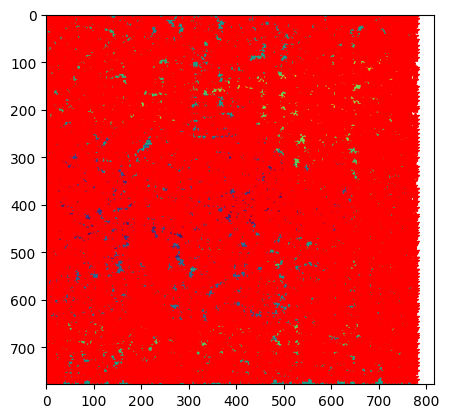

In [24]:
def draw_stars(img, x, y):
    f = plt.figure()
    plt.imshow(img)
    plt.plot(x, y, '*', color='r')
    plt.show()

draw_stars(fon1, maxes[2], maxes[3])